# Projeto de Análise de Algoritmos
######  Jorge Vitor de Aguiar Lima e Levy Stevam Queiroz da Silva

### Problema de Troco de Moedas

O problema do troco de moedas é um desafio de otimização que busca encontrar a combinação de moedas que totaliza um valor específico utilizando o menor número possível de moedas. Ele visa resolver questões práticas de troco em sistemas de pagamento, garantindo eficiência e precisão na entrega de valores corretos.







### Objetivo

O objetivo deste projeto é comparar dois algoritmos para resolver o problema de troco de moedas, utilizando programação dinâmica. O problema será abordado por meio de duas soluções distintas: uma solução recursiva com memoização e uma solução iterativa. A comparação entre os algoritmos será baseada no tempo de execução médio, representado graficamente, com o eixo horizontal indicando o tamanho da entrada e o eixo vertical mostrando o tempo de execução.

## Metodologia

1. Em python, implementamos os dois algoritmos de forma recursiva e iterativa.

2. Fizemos várias listas de moedas predefinidas, e testemos cada uma delas, para ter um bom número de resultados.

4. o change (valor a ser trocado) foi definido em 27.951, nossa ideia foi colocar um número quebrado para dar mais trabalho aos algoritmos.

3. Rodamos os dois algoritmos nas mesmas listas de moedas, e comparamos o tempo de execução.

4. Nos resultados, plotamos graficos com base nos tempos de execução para sustentar a nossa conclusão.

5. Em conclusão, discutimos o que achamos sobre cada algoritmo, e como cada um performou.

## Bibliotecas

In [1]:
import sys
from datetime import datetime
import matplotlib.pyplot as plt

## Algoritmos

### Recursivo

In [2]:
sys.setrecursionlimit(30000)

def coin_exchange_rec(coinsList: list, change: int):
    '''
    Algoritmo que retorna o numero a solução e o tempo total de execução

    args:
        coinsList: lista de valores de moedas
        change: valor a ser trocado
    
    return:
        count_coin: numero de moedas necessárias para trocar o valor
        time_total: tempo total de execução
    '''
    init_time = datetime.now()

    results = [0] * (change + 1)
    count_coin = coin_exchange_aux(coinsList, change, results)

    end_time = datetime.now()
    time_total = end_time - init_time

    return count_coin, time_total



def coin_exchange_aux(coinsList: list, change: int, results: list) -> int:
    '''
    Função auxiliar do algoritmo que implementa a lógica de fato e retorna a solução

    args:
        coinsList: lista de valores de moedas
        change: valor a ser trocado
        results: lista de resultados
    
    return:
        min_coins: numero de moedas necessárias para trocar o valor
    '''

    if change == 0:
        return 0
    
    if change in coinsList:
        return 1
    
    if results[change] > 0:
        return results[change]
    
    min_coins = change

    for coin in coinsList:
        if coin <= change:
            num_coins = 1 + coin_exchange_aux(coinsList, change - coin, results)
            if num_coins < min_coins:
                min_coins = num_coins
    
    results[change] = min_coins
    return min_coins


### Iterativo

In [3]:
def coin_exchange_iter(coinsList: list, change: int):
    '''
    Algoritmo que retorna o numero a solução e o tempo total de execução
    
    args:
        coinsList: lista de valores de moedas
        change: valor a ser trocado
    
    returns:
        results[change]: numero de moedas necessárias para trocar o valor
        time_total: tempo total de execução
    
    '''

    init_time = datetime.now()
    if change == 0:
        return 0
    
    if change in coinsList:
        return 1

    results = [0] * (change + 1)

    for unit in range(change+1):
        num_coins = unit

        for coin in coinsList:
            if coin > unit:
                continue

            if 1 + results[unit - coin] < num_coins:
                num_coins = results[unit - coin] + 1
        results[unit] = num_coins
    
    end_time = datetime.now()
    
    time_total = end_time - init_time

    return results[change], time_total

## Resultados

### Coins lists

In [4]:
coinlists_variations = [
    [1, 5, 10, 25, 50, 100],                           
    [1, 2, 5, 10, 20, 50, 100],                        
    [1, 5, 10, 25, 50, 100, 200, 500],                 
    [1, 3, 7, 12, 25, 50, 75, 100, 150],               
    [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],        
    [1, 4, 8, 15, 30, 60, 120, 240, 500, 1000, 2000],  
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],  
    [1, 6, 13, 27, 55, 110, 220, 440, 880, 1760, 3520, 7040, 14080],  
    [1, 3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288],  
    [1, 9, 18, 36, 72, 144, 288, 576, 1152, 2304, 4608, 9216, 18432, 36864, 73728]  
]


### Função para devolver métricas dos algoritmos

In [5]:

def metrics_algorithms(coinlists: list, change: int):
    avg_iter = 0
    avg_rec = 0
    num_tests = 20

    for _ in range(num_tests):
        _, time_iter = coin_exchange_iter(coinlists, change)
        avg_iter += time_iter.total_seconds()

        _, time_rec = coin_exchange_rec(coinlists, change)
        avg_rec += time_rec.total_seconds()

    avg_iter /= num_tests
    avg_rec = avg_rec / num_tests

    return avg_iter, avg_rec

### Gerar resultados

In [6]:
results = []
# Change definido em 20000
for coinlist in coinlists_variations:
    avg_iter, avg_rec = metrics_algorithms(coinlist, 27951)  
    results.append({
        'len': len(coinlist),
        'avg_iter': avg_iter,
        'avg_rec': avg_rec
    })

### Plotando resultados

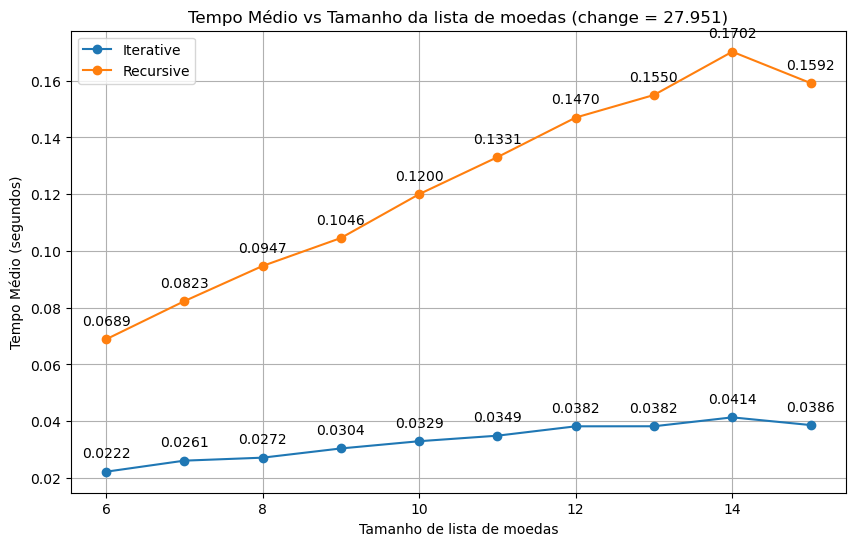

In [7]:
results = sorted(results, key=lambda x: x['len'])

lengths = [r['len'] for r in results]
avg_iter = [r['avg_iter'] for r in results]
avg_rec = [r['avg_rec'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(lengths, avg_iter, label='Iterative', marker='o')
plt.plot(lengths, avg_rec, label='Recursive', marker='o')

for i, txt in enumerate(avg_iter):
    plt.annotate(f'{txt:.4f}', (lengths[i], avg_iter[i]), textcoords="offset points", xytext=(0,10), ha='center')

for i, txt in enumerate(avg_rec):
    plt.annotate(f'{txt:.4f}', (lengths[i], avg_rec[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.xlabel('Tamanho de lista de moedas')
plt.ylabel('Tempo Médio (segundos)')
plt.title('Tempo Médio vs Tamanho da lista de moedas (troco = 27.951)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusões

Como mostra o resultado do teste conduzido o algoritmo feito de forma iterativa teve um desempenho melhor que o de um algoritmo feito de forma recursiva.

Quanto maior o tamanho da lista de moedas, mais o algoritmo recursivo era menos eficiente, já o iterativo se mantinha estável.


### Qual os motivos do recursivo ser menos eficiente que a iteração?

1. Cada vez que uma função recursiva é chamada, o sistema precisa reservar espaço na pilha de chamadas para armazenar o estado da função atual
2. Esse processo de criação e destruição de frames na pilha adiciona uma sobrecarga significativa, especialmente em linguagens onde essa alocação de memória é mais custosa.